[Table of Contents](table_of_contents.ipynb)

# Topic 22.  Invariant Subspaces and Differential Equations
Author: Bryan Redd, bryan.d.redd@gmail.com
    

##  Introduction

Invariant subspaces provide one way to both analytically and intuitively analyze the behavior of linear operators. Intuitively, when an element of an invariant subspace is operated on by its linear operator, the result of the operation will also be in the same subspace. That is why these spaces are "invariant." Invariant subspaces allow us to decompose a linear operator into simpler components. This can be leveraged for efficiency reasons, when computing all of the information associated with the operator might be unnecessary or impractical.

When working with matrices, the subspace spanned by the eigenvectors form the invariant subspaces of the matrix. Summing the projections onto each invariant subspace and scaling by the appropriate eigenvalue results in the same operation as left multiplying by the matrix itself.

Differential and difference equations involving matrices can be analyzed using invariant subspaces.

## Explanation of the theory

### Definition of Invariant Subspace

Let $A$ be a linear operator. If $S \subset R(A)$ is such that $x \in S$ means that $Ax \in S$, then $S$ is said to be an __invariant subspace__ for $A$.

If we know that an element of a given invariant subspace goes into the linear operator, the output will also be an element of that same subspace.

### Analytical Example

If $S$ is an invariant subspace of $A$, then $S$ is an invariant subspace of $e^{At} = I + At + \frac{1}{2!} A^2 t^2 + \frac{1}{3!} A^3 t^3 + \ldots $.

We can prove this if we let $x \in S$ where $S$ is an invariant subspace of $A$. Then by definition of an invariant subspace, we know that $Ax \in S$. Because $S$ is a vector space, we can multiply by a scalar $t$ and know that $Atx \in S$. Operate over $A$ and multiply by the scalar $t/2$ to show that $\frac{1}{2} A^2 t^2 x \in S$. Repeat this process indefinitely to show that every term of $e^{At}x = Ix + Atx + \frac{1}{2!} A^2 t^2 x + \frac{1}{3!} A^3 t^3 x + \ldots \in S$.


## Simple Numerical Examples

One way of visualizing invariant subspaces for matrices is using a phase diagram. Consider the differential equation $\dot{x}(t) = A x(t)$. It can be shown that the solution to this equation is $e^{At}x_0$ where $x(0)=x_0$ is the initial condition and $e^{At}$ is the matrix exponential as defined above. In the Python example below, we plot the solutions to a differential equation with a two-by-two matrix for various intial conditions in red. The initial condition is shown in blue. Note their general tendency to approach the eigenvectors of the matrix $A$ for large values of t.


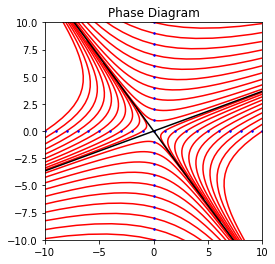

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import expm, eig

# Example matrix
A = np.array([
    [.6,.8],
    [.4,-.2]
], dtype='float')

# Plot parameters
xlim = 10
ylim = 10
plt.axis('square')
plt.xlim(-xlim, xlim)
plt.ylim(-ylim, ylim)
plt.title("Phase Diagram")

# Displays the contour with the initial condition
def displayCountour(z0):
    z = np.zeros((2, t.size))
    for i in range(0, z.shape[1]):
        z[:,i] = expm(A * t[i]) @ z0
    plt.plot(z[0,:],z[1,:],'r') # show contour in red
    plt.plot(z0[0], z0[1], '.b', markersize=3)

# Plot solutions to differential equation in phase diagram
t = np.linspace(-4,4,num=51)
for x0 in range(-xlim, xlim+1):
    displayCountour(np.array([x0,0]))
    displayCountour(np.array([0,x0]))

# Plot eigenvectors (invariant subspaces)
t = np.linspace(-20,20,num=301)
l, T = np.linalg.eig(A)
for i in range(0,l.size):
    plt.plot(T[0,i] * t, T[1,i] * t,'k')

# Show the final plot
plt.show()

## An Engineering Application

Note that in the above example, we are reliant on scipy.linalg.expm() to calculate the matrix exponential. Perhaps we would like to avoid such a computationally expensive function in a DSP application. Perhaps importing a library to do these computations would be too large on a small microprocessor. We can utilize invariant subspaces to simplify the computations.

Assume we can diagonalize $A=T\Lambda T^{-1}$. Then we can write
$$
e^{At} = I + At + \frac{1}{2} A^2 t^2 + \ldots \\
e^{At} = TT^{-1} + T \Lambda T^{-1} t + \frac{1}{2} T^2 \Lambda^2 T^{-2} t^2 + \ldots \\
e^{At} = TT^{-1} + T \Lambda T^{-1} t + \frac{1}{2} T \Lambda^2 T^{-1} t^2 + \ldots \\
e^{At} = T ( I + At + \frac{1}{2} A^2 t^2 + \ldots ) T^{-1} \\
e^{At} = T ( e^{\Lambda t} ) T^{-1} \\
$$

Now we can substitute that expression into the solution to obtain
$$
x(t) = Te^{\Lambda t}T^{-1}x_0 \\
T^{-1}x(t) = e^{\Lambda t}T^{-1}x_0 \\
z(t) = e^{\Lambda t} z_0
$$
where $z(t) = T^{-1}x(t)$ and $z_0 = T^{-1}x_0$.

Now we can calculate everything in terms of $z$ easily because $e^{\Lambda t}$ is a diagonal matrix. In scalar form, we obtain
$$
z_1(t) = e^{\lambda_1 t} z_{10} \\
\vdots \\
z_n(t) = e^{\lambda_n t} z_{n0}
$$

Once we obtain our $z$, we can use $x(t) = Tz(t)$ to transform our coordinate system back into something in terms of $x$.

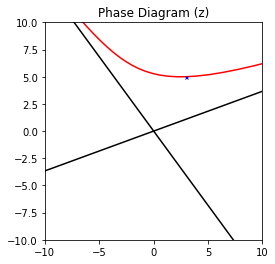

In [2]:
# initial condition
x0 = np.array([
    [3],
    [5]
],dtype='float')

# transform x initial condition to z coordinates
z0 = np.linalg.inv(T) @ x0 

# solve in terms of z
# note that we do not need to call scipy.linalg.expm() here. Because we know the eigenvalues and eigenvectors, we can avoid that messy computation.
t = np.linspace(-4,4,num=51)
z = np.zeros((2, t.size))
for i in range(0, t.size):
    z[0,i] = np.exp(l[0] * t[i]) * z0[0]
    z[1,i] = np.exp(l[1] * t[i]) * z0[1]

# transform z solution to x coordinates
x = np.zeros((2, t.size))
for i in range(0, t.size):
    x[:,i] = T @ z[:,i]

# plot solution with initial condition
plt.plot(x[0,:], x[1,:], 'r')
plt.plot(x0[0,0], x0[1,0], color='b', marker='x', markersize='3')
# plot eigenvectors for reference
t = np.linspace(-20,20,num=301)
l, T = np.linalg.eig(A)
for i in range(0,l.size):
    plt.plot(T[0,i] * t, T[1,i] * t,'k')

# plot paramters, show plot
xlim = 10
ylim = 10
plt.axis('square')
plt.xlim(-xlim, xlim)
plt.ylim(-ylim, ylim)
plt.title("Phase Diagram (z)")
plt.show()

This matches the solution we obtained by using the np.linalg.expm() function call.

## Challenge Problem: Markov Chains

An engineer is analyzing data from their popular video-based social media company TikTak to better understand how users interact with their platform. A user can do one of three things: watch a video, view a profile, or create a video. The engineer denotes each of these activies as states which are denoted W, P, and C, respectively. The engineer wants to know the distribution of types https requests (Q, V, M) to model the amount of data that must be processed by the servers to fulfill the users' requests.

The engineer observes that if the user just made a W request (the user watched a video), there is a 90% the next request will be a W (to watch another), a 5% chance that the next will be a P (view a profile), and a 5% chance the next will be a C (create a video). If the most recent request was a P, there is a 70%, 0%, and 30% chance for a subsequent W, P, or C request, respectively. Likewise, a recent C request means that there is a 60%, 20%, and 20% chance for a subsequent W, P, or C request, respectively. These transition probabilities can be summarized by the transition matrix
$$
M = \begin{bmatrix}
.90 & .70 & .60 \\
.05 & .00 & .20 \\
.05 & .30 & .20
\end{bmatrix}
$$
Such a matrix is a Markov matrix because there are no negative entries and the sum of each column is equal to one.

The engineer would like to determine the proportions of https requests from the users as a whole.

1. Write a difference equation that represents the probabilities of the next request in terms of the probabilities of the previous request.
2. In the light of invariant subspaces, determine the steady-state probabilities associated with each of the three requests.
3. What percentage of https requests will be a user wanting to view a profile (P)?
